In [5]:
# Initialize Otter
import otter
grader = otter.Notebook("lab07.ipynb")

# Lab 7: Crime and Penalty

Welcome to Lab 7!

In [6]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)


# Lab Warm Up!
We will work together as a class in the following coding cells to prepare you for all sections of this lab. 

**Make sure to come to lab on time so you don't miss points for this warm-up!**

Open the text book and let's go over section [12.1 A/B Testing](https://inferentialthinking.com/chapters/12/1/AB_Testing.html)!

In [7]:
# Run this cell to look at the data on births
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


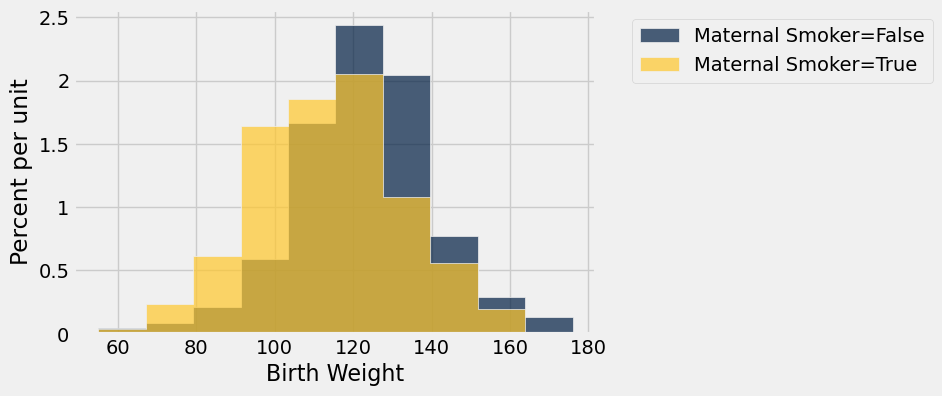

In [8]:
# Let's look at 2 variables, you can follow along using the example in the book
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight
smoking_and_birthweight.hist('Birth Weight', group = 'Maternal Smoker')

Null hypothesis: In the population, the distribution of birth weights of babies is the same for mothers who don’t smoke as for mothers who do. The difference in the sample is due to chance.

Alternative hypothesis: In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

Note: This data is observationl so any significant difference based on just this dataset should be reported as a association not a casual relationship.

Control group:non-smokers
Treatmetn group: smokers

Statistic will be the difference in the means, noting that we think that babies born to smokers have a lower birth rate. 

*Add lab discussion notes here*

In [10]:
# Just run this cell
def difference_of_means(table, group_label):
    """Takes: name of table,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean birth weights of the two groups"""
    reduced = table.select('Birth Weight', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [11]:
smoking_and_birthweight.group('Maternal Smoker', np.average)

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [12]:
# Calculating the observed statistic
difference_of_means(smoking_and_birthweight, 'Maternal Smoker')

-9.266142572024918

Let's discuss as a class: What is random permutation? How can this help us with testing our hypothesis?

Permutation tests the null hypothesis by shuffling the labels and reassigning them to new birthweights so that we can compute a new statistic at every iteration. Ths technique allows us to see what differences we should expect in the two birthweights IF the labels don't matter. 

After simulating thousands of statistics generated by permutation we compare our array of statistics against our observed statistic. We can also visualize to see where the observed statistic is compared to the histogram of generated statistics.

Let's discuss as a class: Conclusion after testing and the empirical p-value?
Compute the proportion of simulated statistics that are further in the tail from our observed statistic. P-values that are smaller than a decision rule are in favor of the alternative hypothesis. 

*Add lab discussion notes here* If we find that there is no difference, or there is a differnece, we have to remmeber the type of study that generated the data so we can make an appropriate conclusion regarding causality or just association. 

Let's get started as a class and complete question 1.1 together!

## 1. A/B Testing

A/B testing is a form of hypothesis testing that allows you to make comparisons between two distributions.

You'll almost never be explicitly asked to perform an A/B test. Make sure you can identify situations where the test is appropriate and know how to correctly implement each step.  

**Question 1.1:** The following statements are the unordered steps of an A/B hypothesis test:

1. Choose a test statistic (typically the difference in means between two categories)

2. Shuffle the labels of the original sample, find your simulated test statistic, and repeat many times

3. Find the value of the observed test statistic

4. Calculate the p-value based off your observed and simulated test statistics

5. Define a null and alternate model

6. Use the p-value and p-value cutoff to draw a conclusion about the null hypothesis

Make an array called `ab_test_order` that contains the correct order of an A/B test, where the first item of the array is the first step of an A/B test and the last item of the array is the last step of an A/B test



In [13]:
ab_test_order = make_array(5, 1, 3, 2, 4, 6)

In [14]:
grader.check("q1_1")

q1_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.2:** If the null hypothesis of an A/B test is correct, should the order of labels affect the differences in means between each group? Why do we shuffle labels in an A/B test? 



The order of the labels should not affect the differences in means between each group. Why we shuffle lables in an A/B test is because it ensures the count of True and False labels does not change. This is important because if when compared it can interpret if the data agrees with the null or the alternative hypotheses.

<!-- END QUESTION -->

## 2: Murder Rates

Punishment for crime has many [philosophical justifications](http://plato.stanford.edu/entries/punishment/#ThePun).  An important one is that fear of punishment may *deter* people from committing crimes.

In the United States, some jurisdictions execute people who are convicted of particularly serious crimes, such as murder.  This punishment is called the *death penalty* or *capital punishment*.  The death penalty is controversial, and deterrence has been one focal point of the debate.  There are other reasons to support or oppose the death penalty, but in this project we'll focus on deterrence.

The key question about deterrence is:

> Through our exploration, does instituting a death penalty for murder actually reduce the number of murders?

You might have a strong intuition in one direction, but the evidence turns out to be surprisingly complex.  Different sides have variously argued that the death penalty has no deterrent effect and that each execution prevents 8 murders, all using statistical arguments!  We'll try to come to our own conclusion.

#### The data

The main data source for this lab comes from a [paper](http://cjlf.org/deathpenalty/DezRubShepDeterFinal.pdf) by three researchers, Dezhbakhsh, Rubin, and Shepherd.  The dataset contains rates of various violent crimes for every year 1960-2003 (44 years) in every US state.  The researchers compiled the data from the FBI's Uniform Crime Reports.

Since crimes are committed by people, not states, we need to account for the number of people in each state when we're looking at state-level data.  Murder rates are calculated as follows:

$$\text{murder rate for state X in year Y} = \frac{\text{number of murders in state X in year Y}}{\text{population in state X in year Y}}*100000$$

(Murder is rare, so we multiply by 100,000 just to avoid dealing with tiny numbers.)

In [15]:
murder_rates = Table.read_table('crime_rates.csv').select('State', 'Year', 'Population', 'Murder Rate')
murder_rates.set_format("Population", NumberFormatter)

State,Year,Population,Murder Rate
Alaska,1960,"226,167",10.2
Alaska,1961,"234,000",11.5
Alaska,1962,"246,000",4.5
Alaska,1963,"248,000",6.5
Alaska,1964,"250,000",10.4
Alaska,1965,"253,000",6.3
Alaska,1966,"272,000",12.9
Alaska,1967,"272,000",9.6
Alaska,1968,"277,000",10.5
Alaska,1969,"282,000",10.6


Murder rates vary over time, and different states exhibit different trends. The rates in some states change dramatically from year to year, while others are quite stable. Let's plot a couple, just to see the variety.

**Question 2.1.** Using the given tables `ak` and `mn` in the code cell below, create a table `ak_mn` with two columns of murder rates (one for Alaska, one for Minnesota), in addition to a column of years. This table will have the following structure:

| Year | Murder rate in Alaska | Murder rate in Minnesota |
|------|-----------------------|--------------------------|
| 1960 | 10.2                  | 1.2                      |
| 1961 | 11.5                  | 1                        |
| 1962 | 4.5                   | 0.9                      |

<center>... (41 rows omitted)</center>



In [16]:
# The next lines are provided for you.  They create a table
# containing only the Alaska information and one containing
# only the Minnesota information.
ak = murder_rates.where('State', 'Alaska').drop('State', 'Population').relabeled(1, 'Murder rate in Alaska')
mn = murder_rates.where('State', 'Minnesota').drop('State', 'Population').relabeled(1, 'Murder rate in Minnesota')

# Fill in this line to make a table like the one pictured above.
ak_mn = ak.join('Year', mn)
ak_mn

Year,Murder rate in Alaska,Murder rate in Minnesota
1960,10.2,1.2
1961,11.5,1
1962,4.5,0.9
1963,6.5,1.2
1964,10.4,1.4
1965,6.3,1.4
1966,12.9,2.2
1967,9.6,1.6
1968,10.5,2.2
1969,10.6,1.9


In [17]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2:** Using the table `ak_mn`, draw a line plot that compares the murder rate in Alaska and the murder rate in Minnesota over time. Draw a line plot with years on the horizontal axis and murder rates on the vertical axis. Make sure it includes two lines: one for Alaska murder rates and one for Minnesota murder rates. Create this plot using a single call.



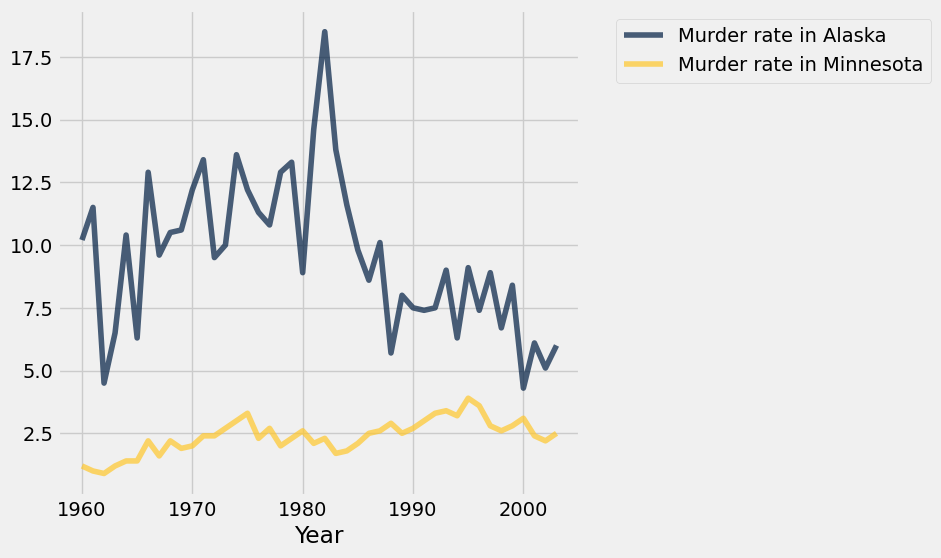

In [18]:
# Draw your line plot here
ak_mn.plot('Year', ('Murder rate in Alaska','Murder rate in Minnesota'))

Now what about the murder rates of other states? Say, for example, California and New York? Run the cell below to plot the murder rates of different pairs of states.

In [20]:
# Compare the murder rates of any two states by filling in the blanks below

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def state(state1, state2):
    state1_table = murder_rates.where('State', state1).drop('State', 'Population').relabeled(1, 'Murder rate in {}'.format(state1))
    state2_table = murder_rates.where('State', state2).drop('State', 'Population').relabeled(1, 'Murder rate in {}'.format(state2))
    s1_s2 = state1_table.join('Year', state2_table)
    s1_s2.plot('Year')
    plt.show()

states_array = murder_rates.group('State').column('State')

_ = interact(state,
             state1=widgets.Dropdown(options=list(states_array),value='California'),
             state2=widgets.Dropdown(options=list(states_array),value='New York')
            )

interactive(children=(Dropdown(description='state1', index=4, options=('Alabama', 'Alaska', 'Arizona', 'Arkans…

## 3. The Death Penalty

Some US states have the death penalty, and others don't, and laws have changed over time. In addition to changes in murder rates, we will also consider whether the death penalty was in force in each state and each year.

Using this information, we would like to investigate how the presence of the death penalty affects the murder rate of a state.

**Question 3.1.** We want to know whether the death penalty *causes* a change in the murder rate.  Why is it not sufficient to compare murder rates in places and times when the death penalty was in force with places and times when it wasn't?



Why it is not sufficient to compare murder rates in places and times when the death penalty was in force with places and times it wasnt because there are so many other factors which could also affect murder rates like the economy of an area or education level for example. 

<!-- END QUESTION -->

### A Natural Experiment

In order to attempt to investigate the causal relationship between the death penalty and murder rates, we're going to take advantage of a *natural experiment*.  A natural experiment happens when something other than experimental design applies a treatment to one group and not to another (control) group, and we have some hope that the treatment and control groups don't have any other systematic differences.

Our natural experiment is this: in 1972, a Supreme Court decision called *Furman v. Georgia* banned the death penalty throughout the US.  Suddenly, many states went from having the death penalty to not having the death penalty.

As a first step, let's see how murder rates changed before and after the court decision.  We'll define the test as follows:

> **Population:** All the states that had the death penalty before the 1972 abolition.  (There is no control group for the states that already lacked the death penalty in 1972, so we must omit them.)  This includes all US states **except** Alaska, Hawaii, Maine, Michigan, Wisconsin, and Minnesota.

> **Treatment group:** The states in that population, in 1973 (the year after 1972).

> **Control group:** The states in that population, in 1971 (the year before 1972).

> **Null hypothesis:** Murder rates in 1971 and 1973 come from the same distribution.

> **Alternative hypothesis:** Murder rates were higher in 1973 than they were in 1971.

Our alternative hypothesis is related to our suspicion that murder rates increase when the death penalty is eliminated.  

**Question 3.2:** Should we use an A/B test to test these hypotheses? If yes, what is our "A" group and what is our "B" group?



We should use a A/B test to test the hypotheses. Our "A" group is murder rates before death penalty was established in 1971 and our "B" group is murder rates after death penalty was established in 1973.

<!-- END QUESTION -->

The `death_penalty` table below describes whether each state allowed the death penalty in 1971.

In [21]:
non_death_penalty_states = make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')

def had_death_penalty_in_1971(state):
    """Returns True if the argument is the name of a state that had the death penalty in 1971."""
    # The implementation of this function uses a bit of syntax
    # we haven't seen before.  Just trust that it behaves as its
    # documentation claims.
    return state not in non_death_penalty_states

states = murder_rates.group('State').select('State')
death_penalty = states.with_column('Death Penalty', states.apply(had_death_penalty_in_1971, 0))
death_penalty

State,Death Penalty
Alabama,True
Alaska,False
Arizona,True
Arkansas,True
California,True
Colorado,True
Connecticut,True
Delaware,True
Florida,True
Georgia,True


**Question 3.3:** Use the `death_penalty` and `murder_rates` tables to find murder rates in 1971 for states with the death penalty before the abolition. Create a new table `preban_rates` that contains the same information as `murder_rates`, along with a column `Death Penalty` that contains booleans (`True` or `False`) describing if states had the death penalty in 1971.



In [27]:
# Find the states that had death penalty in 1971
# STEP 1: Combine/join the tables murder_rates and death_penalty
rates_and_penalty = murder_rates.join('State', death_penalty)
rates_and_penalty
# STEP 2: Reduce the new table rates_penalty to only include the States with the death penalty in the year 1971
preban_rates = rates_and_penalty.where('Year', 1971).where('Death Penalty', True) 
preban_rates

State,Year,Population,Murder Rate,Death Penalty
Alabama,1971,"3,479,000",15.1,True
Arizona,1971,"1,849,000",6.7,True
Arkansas,1971,"1,944,000",10.5,True
California,1971,"20,223,000",8.1,True
Colorado,1971,"2,283,000",6.5,True
Connecticut,1971,"3,081,000",3.1,True
Delaware,1971,"558,000",6.1,True
Florida,1971,"7,041,000",13.3,True
Georgia,1971,"4,664,000",16,True
Idaho,1971,"732,000",3.3,True


In [28]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4:** Create a table `postban_rates` that contains the same information as `preban_rates`, but for 1973 instead of 1971. `postban_rates` should only contain the states found in `preban_rates`.



In [46]:
# STEP 1: Save the states from table preban_rates in an array states_with_penalty 
states_with_penalty = preban_rates.column('State')

# STEP 2: start from table murder_rates and use the table method "where()" and the predicate "are.contained_in()" to 
# create a new table for 1973 that only contains the states saved in states_with_penalty
rates_1973 = murder_rates.where('Year', 1973).where('State', are.contained_in(states_with_penalty))

#STEP 3: Add a column Death Penalty (since this is after the ban, all states should have the penalty set to False)
postban_rates = rates_1973.with_column('Death Penalty', False)

postban_rates = postban_rates.sort("State")
postban_rates

State,Year,Population,Murder Rate,Death Penalty
Alabama,1973,"3,539,000",13.2,False
Arizona,1973,"2,058,000",8.1,False
Arkansas,1973,"2,037,000",8.8,False
California,1973,"20,601,000",9,False
Colorado,1973,"2,437,000",7.9,False
Connecticut,1973,"3,076,000",3.3,False
Delaware,1973,"576,000",5.9,False
Florida,1973,"7,678,000",15.4,False
Georgia,1973,"4,786,000",17.4,False
Idaho,1973,"770,000",2.6,False


In [47]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5:** Combine `preban_rates_copy` and `postban_rates` to create a table `change_in_death_rates` that contains each state's population, murder rate, and whether or not that state had the death penalty for both 1971 and 1973. 


In [48]:
preban_rates_copy = preban_rates.copy()

# HINT: If tbl_1 and tbl_2 are tables, tbl_1.append(tbl_2) will create a new table 
# that includes rows from both tbl_1 and tbl_2. Both tables must have exactly the same columns, in the same order.
change_in_death_rates = preban_rates_copy.append(postban_rates)
change_in_death_rates

State,Year,Population,Murder Rate,Death Penalty
Alabama,1971,"3,479,000",15.1,True
Arizona,1971,"1,849,000",6.7,True
Arkansas,1971,"1,944,000",10.5,True
California,1971,"20,223,000",8.1,True
Colorado,1971,"2,283,000",6.5,True
Connecticut,1971,"3,081,000",3.1,True
Delaware,1971,"558,000",6.1,True
Florida,1971,"7,041,000",13.3,True
Georgia,1971,"4,664,000",16,True
Idaho,1971,"732,000",3.3,True


Run the cell below to view the distribution of death rates during the pre-ban and post-ban time periods.

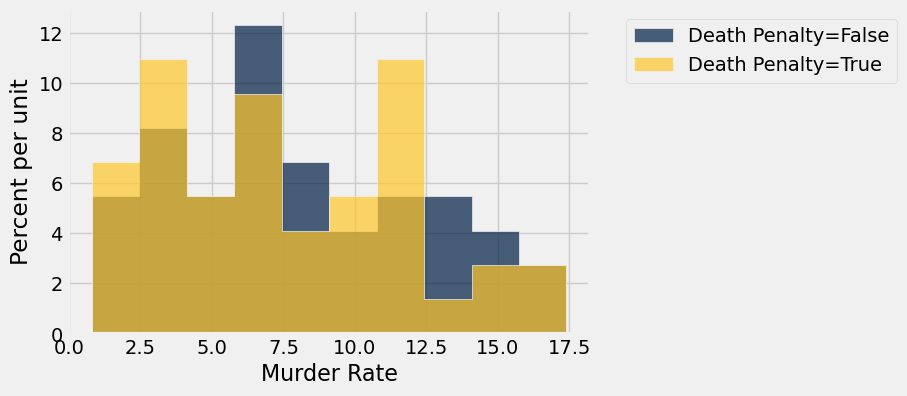

In [49]:
change_in_death_rates.hist('Murder Rate', group = 'Death Penalty')

**Question 3.6:** Create a table `rate_means` that contains the average murder rates for the states that had the death penalty and the states that didn't have the death penalty. It should have two columns: one indicating if the penalty was in place, and one that contains the average murder rate for each group.


In [56]:
# HINTS: Start from change_in_death_rates defined in Question 3.5
# STEP 1: reduce the table to the 2 columns of interest, 
# STEP 2: use the method group() to separate the states with/without Death Penalty 
# and display the average murder rate for each group
rate_means = change_in_death_rates.select('Murder Rate', 'Death Penalty').group('Death Penalty', np.average)
rate_means

Death Penalty,Murder Rate average
False,8.12045
True,7.51364


In [54]:
grader.check("q3_6")

q3_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.7:** We want to figure out if there is a difference between the distribution of death rates in 1971 and 1973. Specifically, we want to test if murder rates were higher in 1973 than they were in 1971. 

What should the test statistic be? How does it help us differentiate whether the data supports the null and alternative? 

If you are in lab, confirm your answer with your instructor or a tutor before moving on.



The test statistic would be the difference between the two groups(first goup is murder rates in 1971 and second group is murder rates in 1973). How it helps us differentiate whether data supports the null  and alternative is by if the difference ends up being much larger than expected we can reject the null hypotheses(equal to 0 or close) and say that the data supports the alternative hypotheses

<!-- END QUESTION -->

**Question 3.8:** Set `observed_difference` to the observed test statistic using the `rate_means` table 


In [62]:
# STEP 1: Safe the Murder Rate average column of table rate_means into an array 'means'
means = rate_means.column('Murder Rate average')
# STEP 2: Calculated the observed test statistic using the array means
observed_difference = means.item(0) - means.item(1)
observed_difference

0.6068181600659095

In [63]:
grader.check("q3_8")

q3_8 results: All test cases passed!

**Question 3.9:** Given a table like `change_in_death_rates`, a value column `label`, and a group column `group_label`, write a function that calculates the appropriate test statistic.


In [70]:
# HINT: Combine the steps from question 3.6 and question 3.8, to create a generic function
# Use the input arguments: table, labels_col and values_col
# Make sure you are NOT use change_in_death_rates, "Death Penalty" and "Murder Rate" inside your function definition

def find_test_stat(table, labels_col, values_col):
    grouped = table.select(values_col, labels_col).group(labels_col, np.average)
    means = grouped.column(values_col + ' average')
    test_stat = means.item(0) - means.item(1)
    return test_stat

find_test_stat(change_in_death_rates, "Death Penalty", "Murder Rate")

0.6068181600659095

In [67]:
grader.check("q3_9")

q3_9 results: All test cases passed!

When we run a simulation for A/B testing, we resample by shuffling the labels of the original sample. If the null hypothesis is true and the murder rate distributions are the same, we expect that the difference in mean death rates will be not change when "Death Penalty" labels are changed.

**Question 3.10:** Write a function `simulate_and_test_statistic` to compute one trial of our A/B test. Your function should run a simulation and return a test statistic.


In [79]:
# Note: The test here is fairly lenient, if you have an issue with the following questions, make sure to take 
# a look at your answer to 3.9. 
# Specifically, make sure that you are taking the directionality of our alternative hypothesis into account.
def simulate_and_test_statistic(table, labels_col, values_col):
    shuffled_labels = table.sample(with_replacement=False).column(labels_col)
    shuffled_table = table.with_column(labels_col, shuffled_labels)
    test_stat = find_test_stat(shuffled_table, labels_col, values_col)
    return test_stat

simulate_and_test_statistic(change_in_death_rates, "Death Penalty", "Murder Rate")

-1.7249999629750006

In [80]:
grader.check("q3_10")

q3_10 results: All test cases passed!

**Question 3.11:** Simulate 5000 trials of our A/B test and store the test statistics in an array called `differences`


In [81]:
# This cell might take a couple seconds to run
differences = make_array()
for i in range(5000):
    new_stat = simulate_and_test_statistic(change_in_death_rates, "Death Penalty", "Murder Rate")
    differences = np.append(differences, new_stat)


differences

array([-0.5659091 , -0.38409092,  1.04772729, ...,  1.04318185,
       -0.07954547, -0.6340909 ])

In [82]:
grader.check("q3_11")

q3_11 results: All test cases passed!

Run the cell below to view a histogram of your simulated test statistics plotted with your observed test statistic

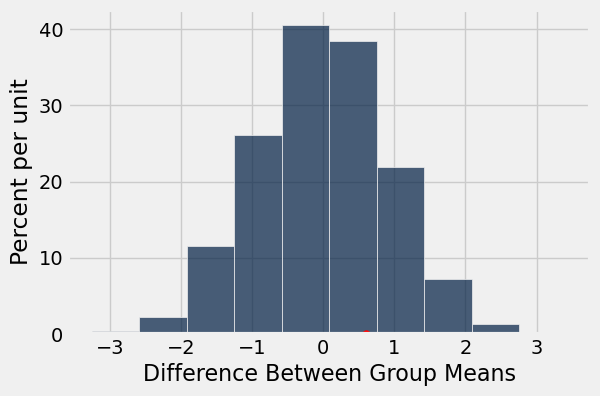

In [83]:
Table().with_column('Difference Between Group Means', differences).hist()
plt.scatter(observed_difference, 0, color='red', s=30, zorder=2);

**Question 3.12:** Find the p-value for your test and assign it to `empirical_P`


In [84]:
empirical_P = np.count_nonzero(differences <= observed_difference) / 5000
empirical_P

0.7494

In [85]:
grader.check("q3_12")

q3_12 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.13:** Using a 5% P-value cutoff, draw a conclusion about the null and alternative hypotheses. Describe your findings using simple, non-technical language. What does your analysis tell you about murder rates after the death penalty was suspended? What can you claim about causation from your statistical analysis?


Since the p-value is 0.7494 which is way higher than 0.05 we can’t reject the null hypothesis. This means theres no strong evidence that murder rates were higher in 1973 compared to 1971. From this it seems like stopping the death penalty didn’t really make a noticeable difference in murder rates. But we can’t say for sure that the abolishment of the death penalty caused anything. There could be other factors(economy and education for example) we didn’t look into that might have affected the results.

<!-- END QUESTION -->

**You're done! Congratulations.** 
Be sure to...

- run the tests and verify that they all pass, 
- choose **Download as PDF** from the **File** menu
- submit the .pdf file on **canvas**.